<a href="https://colab.research.google.com/github/Kaif10/Friends_emotion-detection-with-NLP/blob/master/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I have trained A Neural Net with Bi-directional LSTM on emotion-detection data,  classifying text into love, sadness, fear, etc. I then scraped some tweets from twitter to test my model and got pretty good predictions.


A. Analysing the text.

B. Removing Stopwords. 

C. lemmatization.

D.Converting it to dataframe.

E. Tokeniztion and converting it to a numvector

F. Training the model.

G. Scraping tweets from two accounts with twitter_scraper.

H. Predicting sentiment of tweets with the trained model.


In [0]:
#import required modules 
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
#display.max_colwidth will show us entire columns without truncating any part
pd.set_option('display.max_colwidth', None)

#read data
train_data = open("train.txt", "r")
val_data = open("val.txt", "r")


In [0]:
#Read have a look at some of the lines from the file
for i in range(1,15):
  print(train_data.readlines(i))
  
#We can cleraly see the sentences and their labels are seperated by ';' 

['i didnt feel humiliated;sadness\n']
['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n']
['im grabbing a minute to post i feel greedy wrong;anger\n']
['i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n']
['i am feeling grouchy;anger\n']
['ive been feeling a little burdened lately wasnt sure why that was;sadness\n']
['ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise\n']
['i feel as confused about life as a teenager or as jaded as a year old man;fear\n']
['i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy\n']
['i feel romantic too;love\n']
['i feel like i have to make the suffering i m seeing mean something;sadness\n']
['i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy\n'

Function for cleaning text.

In [0]:
import time
# Text Processing Libraries
import spacy
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text.lower()


In [0]:
#Seperate the sentence and label
list_train = []
for x in  train_data:
  list_train.append(x.split(';'))
print(list_train[9])
len(list_train)



['i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me', 'joy\n']


15986

Analysing some data.

In [0]:
list_train[3:26]

[['i feel pretty pathetic most of the time', 'sadness\n'],
 ['i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties',
  'sadness\n'],
 ['i now feel compromised and skeptical of the value of every unit of work i put in',
  'fear\n'],
 ['i feel irritated and rejected without anyone doing anything or saying anything',
  'anger\n'],
 ['i am feeling completely overwhelmed i have two strategies that help me to feel grounded pour my heart out in my journal in the form of a letter to god and then end with a list of five things i am most grateful for',
  'fear\n'],
 ['i have the feeling she was amused and delighted', 'joy\n'],
 ['i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me',
  'joy\n'],
 ['i already feel like i fucked up though because i dont usually eat at all in the morning',
  'anger\n'],
 ['i still love my so and wish the best for him 

In [0]:
#sentence contains the text and labels contain the emotion of text.
sentence = []
labels = []
for a in range(len(list_train)):
  sentence.append(list_train[a][0])
  labels.append(list_train[a][1])
print(len(sentence))
print(sentence[180])
labels[180]


15986
i felt sad when a friend of mine died and i felt that something had irrevocably gone away from me


'sadness\n'

In [0]:
#cleaning the labels by removinh '\n'
clean_labels = []
for e in labels:
  clean_labels.append(clean_text(e))
clean_labels[:20]


['joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger']

In [0]:
#convert the list into data frame for better analysis
train_df = pd.DataFrame(list(zip(sentence, clean_labels)), 
               columns =['Sentences', 'emotion']) 

In [0]:
train_df

,Sentences,emotion
0,i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious,joy
1,i do not feel reassured anxiety is on each side,joy
2,i didnt really feel that embarrassed,sadness
3,i feel pretty pathetic most of the time,sadness
4,i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties,sadness
...,...,...
15981,i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up,sadness
15982,i am now turning and i feel pathetic that i am still waiting tables and subbing with a teaching degree,sadness
15983,i feel strong and good overall,joy
15984,i feel like this was such a rude comment and im glad that t,anger


In [0]:
#take a look at the value_counts of emotion which are our labels
train_df['emotion'].value_counts()

joy         5360
sadness     4661
anger       2156
fear        1936
love        1302
surprise     571
Name: emotion, dtype: int64

Removing Stopwords

In [0]:
#An importent step of text processing
#removing the unnecessary stopwords
!pip install nlppreprocess
from nlppreprocess import NLP

nlp = NLP()

train_df['Sentences_clean'] = train_df['Sentences'].apply(nlp.process)



In [0]:
train_df

,Sentences,emotion,Sentences_clean
0,i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious,joy,immense sympathy with general point but possible proto writer trying find time write in corners life and with no sign agent let alone publishing contract feels little precious
1,i do not feel reassured anxiety is on each side,joy,not feel reassured anxiety each side
2,i didnt really feel that embarrassed,sadness,not really feel embarrassed
3,i feel pretty pathetic most of the time,sadness,feel pretty pathetic most time
4,i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties,sadness,started feeling sentimental about dolls had child and began collection vintage barbie dolls from sixties
...,...,...,...
15981,i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up,sadness,just had very brief time in beanbag and said anna feel like been beaten up
15982,i am now turning and i feel pathetic that i am still waiting tables and subbing with a teaching degree,sadness,am now turning and feel pathetic am still waiting tables and subbing with teaching degree
15983,i feel strong and good overall,joy,feel strong and good overall
15984,i feel like this was such a rude comment and im glad that t,anger,feel like such rude comment and im glad t


Lemmatization function.
(Generalizing tense of  words, meanings like good, better is the same. 

In [0]:
#import necesaary functions for lemmatization.
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [0]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
sentences_list=[]
labels_list =[]

for i in range(len(train_df.emotion)):

# lemmatize to cluster similar words like good, better into one word 'good', generalize tense as it doesn't have much impact on sentiment.
    sentences_list.append(lemmatizer.lemmatize(train_df['Sentences_clean'][i]))
    labels_list.append(train_df.emotion[i])


print(sentences_list[1000])
print(labels_list[1000])

cant help feeling mad man
anger


Tokenization and convert word2vec

In [0]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
tokenizer = Tokenizer(num_words = 20000, oov_token= 'OOV')
tokenizer.fit_on_texts(sentences_list)



train_sequences = tokenizer.texts_to_sequences(sentences_list)
train_padded = pad_sequences(train_sequences, maxlen=30, padding= 'post', truncating='post')


train_padded[1000]


array([ 99, 106,   4, 381, 337,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [0]:
#converting the emotion labels into numbers.
dic = {'joy':0, 'anger': 1, 'love':2, 'fear':3, 'surprise':4, 'sadness' :5}

labels_list_to_num = [dic.get(n, n) for n in labels_list]

labels_list_to_num[:10]

[5, 5, 2, 1, 0, 0, 0, 0, 0, 5]


[0, 0, 5, 5, 5, 3, 1, 3, 0, 0]

In [0]:
#required modules.
import tensorflow as tf
import keras
import random
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



Using TensorFlow backend.


Our Neural Network

In [0]:
vocab_size = 30000
embedding_dim = 128


#our main model.
model = Sequential()
model.add(Embedding(vocab_size+1, embedding_dim, input_length=30))
model.add(Bidirectional(LSTM(120, return_sequences= True)))
model.add(Bidirectional(LSTM(120)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))



In [0]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 128)           3840000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 3,943,142
Trainable params: 3,943,142
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])


One-Hot encoding

In [0]:
#One hot encoding the vectors to fit in the model.
from keras.utils.np_utils import to_categorical   

categorical_labels = to_categorical(np.array(labels_list_to_num), num_classes=6)

Training

In [0]:
#train 
history = model.fit(train_padded, categorical_labels,validation_data = (val_padded, categorical_labels_val) epochs=15)

Epoch 1/15
500/500 [==============================] - 40s 80ms/step - loss: 1.1944 - accuracy: 0.5368
Epoch 2/15
500/500 [==============================] - 39s 78ms/step - loss: 0.3970 - accuracy: 0.8787
Epoch 3/15
500/500 [==============================] - 39s 77ms/step - loss: 0.1995 - accuracy: 0.9362
Epoch 4/15
500/500 [==============================] - 39s 77ms/step - loss: 0.1300 - accuracy: 0.9605
Epoch 5/15
500/500 [==============================] - 39s 78ms/step - loss: 0.0991 - accuracy: 0.9705
Epoch 6/15
500/500 [==============================] - 39s 77ms/step - loss: 0.0823 - accuracy: 0.9745
Epoch 7/15
500/500 [==============================] - 38s 77ms/step - loss: 0.0719 - accuracy: 0.9783
Epoch 8/15
500/500 [==============================] - 39s 77ms/step - loss: 0.0674 - accuracy: 0.9802
Epoch 9/15
500/500 [==============================] - 38s 77ms/step - loss: 0.0527 - accuracy: 0.9827
Epoch 10/15
500/500 [==============================] - 38s 76ms/step - loss: 0.052

Plot acuracy and loss

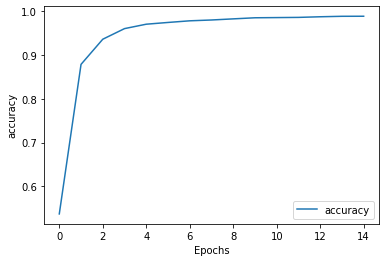

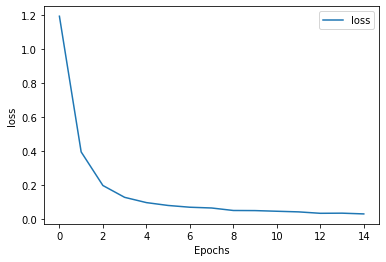

In [0]:
#we got a pretty good accurcay
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
#a smooth graph which is a good indication.


In [0]:
#save the model for further use
model.save("model.h5")

In [0]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = tf.keras.models.load_model('model.h5')

A Python library for scraping tweets

In [0]:
#install twitter_scraper
!pip install twitter_scraper

.

Scraping recent tweets of 
1. Twitter CEO Jack.
2. My twitter friend who is also a software dev.

Scrape tweets

In [0]:
from twitter_scraper import get_tweets
test_list_jack = []
clean_test_list = []

#scraping some of jack's tweets
for tweet in get_tweets('jack', 5):
       #list oh his recent tweets.
       test_list_jack.append(tweet['text'])

       #clean and then lemmatize text.
       clean_test_list.append(lemmatizer.lemmatize(clean_text(tweet['text'].replace("\n"," ").strip())))

Tokenization

In [0]:
#toxenising the sentences to numbers and then padding the text to size of max len text.

tokenizer.fit_on_texts(clean_test_list)
test_sequences = tokenizer.texts_to_sequences(clean_test_list)
test_padded = pad_sequences(test_sequences, maxlen=0, padding= 'post', truncating='post')



In [0]:
model.predict(test_padded[:1]).reshape(6,)

array([1.3218161e-03, 2.1304597e-05, 1.8384169e-08, 2.3171432e-04,
       2.4319220e-09, 9.9842513e-01], dtype=float32)

In [0]:
#take a look at  his latest tweets
test_list[0:11]

['I’m moving $1B of my Square equity (~28% of my wealth) to #startsmall LLC to fund global COVID-19 relief. After we disarm this pandemic, the focus will shift to girl’s health and education, and UBI. It will operate transparently, all flows tracked here: https://docs.google.com/spreadsheets/d/1-eGxq2mMoEGwgSpNVL5j2sa6ToojZUZ-Zun8h2oBAR4\xa0…',
 "SAY COLIN'S NAME https://twitter.com/NFL/status/1269034074552721408\xa0…",
 'This is what #BlackLivesMatter plaza looks like from above. #blm #georgefloyd #WashingtonDC pic.twitter.com/jjCSJR2c3i',
 'Not true and not illegal.\n\nThis was pulled because we got a DMCA complaint from copyright holder. https://twitter.com/realdonaldtrump/status/1269071790015471621\xa0…',
 '#BlackLivesMatter pic.twitter.com/OQg6977n5r',
 'The East Oakland Collective is working for justice through organizing community power and supporting the unhoused. Support them at $EastOakCollective. \n\nWe’ve given $50,000 today and will match payments sent to their $cashtag. \

Function to decode the one-hot encoded vectors that we will get as the prediction.

In [0]:
#function to decoding the predictions.
def decode(datum):
    return np.argmax(datum)


In [0]:
#decoding the predictions.
jack_list = []
for i in range(1,11):

#predicting the sentiment of tweets and decoding the predictions simultaneously.
  jack_list.append(decode(model.predict(test_padded[i-1:i]).reshape(6,)))

Converting th number output to labels that we specified earlier.




In [0]:
#converting the nums to emotion labels.
dic = {0 : 'joy', 1:'anger', 2:'love', 3:'fear', 4:'surprise', 5 :'sadness'}

num_to_emotion_jack = [dic.get(n, n) for n in jack_list]
num_to_emotion_jack

['sadness',
 'love',
 'joy',
 'joy',
 'fear',
 'fear',
 'sadness',
 'joy',
 'joy',
 'love']

the above predictions which consist mostly od sadness and fear by my model clearly show the distress going on in thw world because of racial inequality.

.

Below are those actual tweets that got the above predictions by my neural network.

In [0]:
test_list_jack[:10]

['I’m moving $1B of my Square equity (~28% of my wealth) to #startsmall LLC to fund global COVID-19 relief. After we disarm this pandemic, the focus will shift to girl’s health and education, and UBI. It will operate transparently, all flows tracked here: https://docs.google.com/spreadsheets/d/1-eGxq2mMoEGwgSpNVL5j2sa6ToojZUZ-Zun8h2oBAR4\xa0…',
 "SAY COLIN'S NAME https://twitter.com/NFL/status/1269034074552721408\xa0…",
 'This is what #BlackLivesMatter plaza looks like from above. #blm #georgefloyd #WashingtonDC pic.twitter.com/jjCSJR2c3i',
 'Not true and not illegal.\n\nThis was pulled because we got a DMCA complaint from copyright holder. https://twitter.com/realdonaldtrump/status/1269071790015471621\xa0…',
 '#BlackLivesMatter pic.twitter.com/OQg6977n5r',
 'The East Oakland Collective is working for justice through organizing community power and supporting the unhoused. Support them at $EastOakCollective. \n\nWe’ve given $50,000 today and will match payments sent to their $cashtag. \

.

.

Same procedure.

Scraping tweets of my friend Jenny.

In [0]:
test_list_jennypotts = []
clean_test_list2 = []
for tweet in get_tweets('jennypotts'):
       test_list_jennypotts.append(tweet['text'])
       clean_test_list2.append(lemmatizer.lemmatize(clean_text(tweet['text'].replace("\n"," ").strip())))

In [0]:
#here also  most of her tweets are related to  #BlacklivesMatter  Movement.
#Now lets predict the sentiment of her tweets.
test_list_jennypotts[1:11]

['Seeing the immense size of the protest was amazing because so many people support #BLM; but also terrifying as these protests might be the cause of a second wave of #Covid19. pic.twitter.com/0ryYAMWTse',
 "We went for a walk through the park and #Cardiff has come out in full force to support the #BLM movement. Imagine how big it would have been without #Covid19. \n\nThe lack of social distancing was worrying, which is why I didn't join in. pic.twitter.com/sfx0ear0Bo",
 "There is a BLM peaceful protest happening in my local park right now and I feel torn because I don't think it's safe to be there due to covid19 but I do support the cause.",
 "I'm really struggling to concentrate with everything going on. I don't feel comfortable switching off from everything and going back into my bubble.\n\nThere's a time to hide, and it is not now.",
 'I feel that this is relevant to bring back up. Our histories are all intertwined so we must all band together to fight for change. https://twitter.c

In [0]:
#toxenising the sentences to numbers and then padding the text to size of max len text.

tokenizer.fit_on_texts(clean_test_list2)
test_sequences = tokenizer.texts_to_sequences(clean_test_list2)
test_padded2 = pad_sequences(test_sequences, maxlen=30, padding= 'post', truncating='post')

In [0]:
jennypotts_list = []
for i in range(2,12):
 jennypotts_list.append(decode(model.predict(test_padded2[i-1:i]).reshape(6,)))

In [0]:
num_to_emotion_jennypotts = [dic.get(n, n) for n in jennypotts_list]
num_to_emotion_jennypotts

['fear',
 'joy',
 'sadness',
 'love',
 'fear',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness']

The above predictions made by my Neural Net model is related to sadness and fear growing in the world.